In [ ]:
! mkdir weights 
! wget https://dl.fbaipublicfiles.com/sscd-copy-detection/sscd_disc_mixup.torchscript.pt
! mv sscd_disc_mixup.torchscript.pt weights/

In [17]:
from torchvision import transforms
import matplotlib.pyplot as plt

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225],
)
small_288 = transforms.Compose([
    transforms.Resize(512),
    transforms.ToTensor(),
    normalize,
])
#skew_320 = transforms.Compose([
#    transforms.Resize([320, 320]),
#    transforms.ToTensor(),
#    normalize,
#])

In [18]:
import torch
from PIL import Image

model = torch.jit.load("weights/sscd_disc_mixup.torchscript.pt")

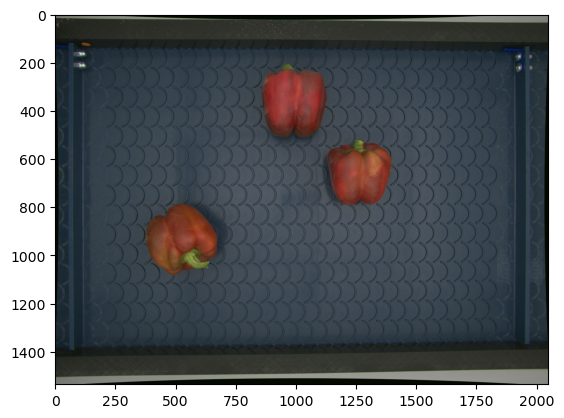

In [19]:
refimg="/home/ec2-user/SageMaker/VegRD_APD_Fruit_Phenotyping/scripts/Retrain_Images/SHIFTP00000000879564420311471_230911_085239_853555.jpg"
img = Image.open(refimg).convert('RGB')
plt.imshow(img)

In [20]:
batch = small_288(img).unsqueeze(0)
embedding = model(batch)[0, :]

In [21]:
embedding.shape

torch.Size([512])